<a href="https://colab.research.google.com/github/fitrianamasruroh/cnn/blob/cnn%2Fface_shape/n_fold_SVM_Kernel_Oke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load modules
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
import pandas as pd 
import numpy as np
import seaborn as sns; sns.set(font_scale=1.2)

In [30]:
# Load dataset
df = pd.read_csv(r"/content/sample_data/sukses.csv")

# Split into training data and test data
#X = df[['Usia','Pendidikan','Tinggi Badan','Tes_Sehat','Pengalaman']]
#y = df['Kelayakan']

X = df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8]].values
y = df.iloc[:, 9].values

# Create training and testing vars, It’s usually around 80/20 or 70/30.
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [31]:

df.head()

,Kelengkapan,Umur,Status,pendidikan,jurusan,sertifikat,Pengalaman,IPK,TPA,Lolos
0,0,1,0,1,0,0,1,1,1,Ya
1,1,0,0,0,0,0,0,1,1,Ya
2,0,1,0,1,1,1,1,1,1,Ya
3,1,0,0,1,1,0,1,1,1,Ya
4,1,0,0,0,0,0,1,1,1,Ya


In [5]:
df["Species"] = df["Species"].replace(["Iris-setosa"], "0")
df["Species"] = df["Species"].replace(["Iris-virginica"], "1")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Kelengkapan  28 non-null     int64 
 1   Umur         28 non-null     int64 
 2   Status       28 non-null     int64 
 3   pendidikan   28 non-null     int64 
 4   jurusan      28 non-null     int64 
 5   sertifikat   28 non-null     int64 
 6   Pengalaman   28 non-null     int64 
 7   IPK          28 non-null     int64 
 8   TPA          28 non-null     int64 
 9   Lolos        28 non-null     object
dtypes: int64(9), object(1)
memory usage: 2.3+ KB


In [33]:
df.describe()

,Kelengkapan,Umur,Status,pendidikan,jurusan,sertifikat,Pengalaman,IPK,TPA
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,0.821429,0.250000,0.214286,0.571429,0.214286,0.178571,0.821429,0.642857,0.714286
std,0.390021,0.440959,0.417855,0.503953,0.417855,0.390021,0.390021,0.487950,0.460044
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,1.000000,0.250000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e0dddd790>,
      dtype=object)

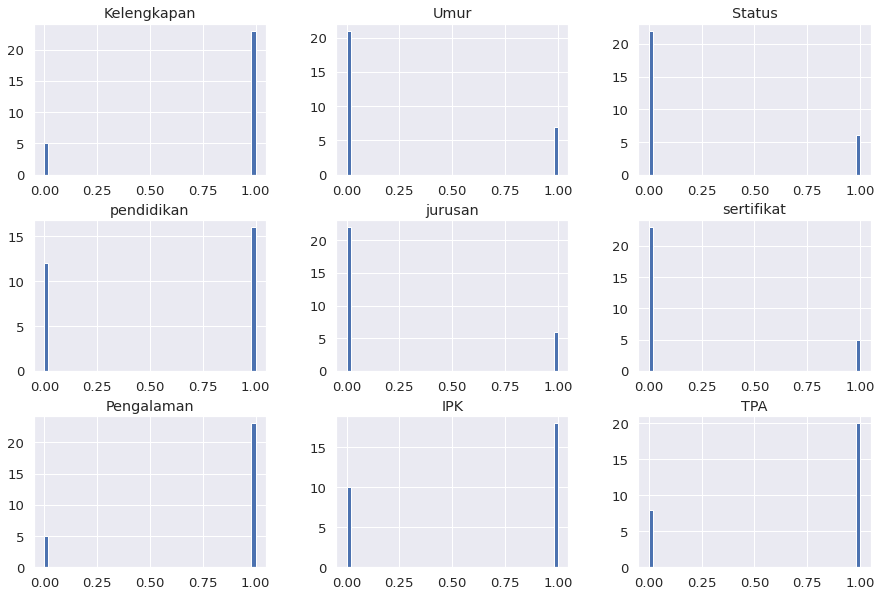

In [34]:
df.hist(bins=50, figsize=(15,10))

In [35]:
# Now we’ll fit the model on the training data
model = SVC(gamma='auto')
model.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
model = SVC(kernel = 'linear', random_state = 0, gamma=.01, C=1) 
model.fit(X_train, Y_train) 


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [59]:
model = SVC(kernel='poly', degree=3, C=1.0, gamma = 'auto') 
model.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [60]:
# Make predictions on validation dataset
predictions = model.predict(X_test)

In [61]:
# Applying k-Fold Cross Validation 
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = model, X = X_train, y = Y_train, cv = 10)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [62]:
accuracies

array([0.66666667, 0.66666667, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.5       , 0.5       ])

In [63]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracies.mean(), accuracies.std()))

0.83 accuracy with a standard deviation of 0.21


In [74]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro']
scores = cross_validate(model, X, y, cv=10, scoring=scoring)
sorted(scores.keys())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sampl

['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']

In [75]:
scores['test_recall_macro']

array([1. , 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1. , 1. ])

In [76]:
scores['test_precision_macro']

array([1.        , 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 1.        , 1.        ])

In [64]:
# Making the Confusion Matrix 
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

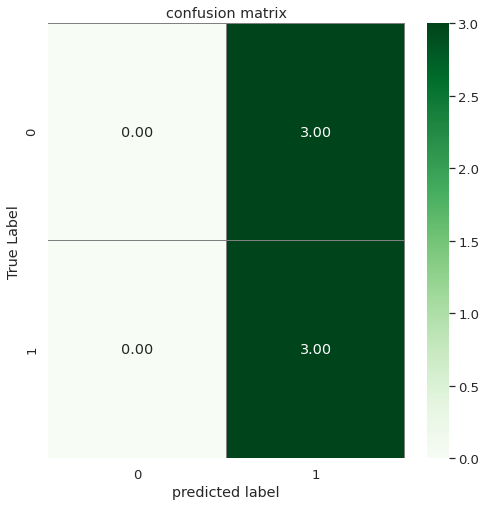

In [65]:
confusion_mtx = confusion_matrix(Y_test, predictions)
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Greens",
            linecolor = "gray",fmt = ".2f",ax=ax
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()

In [66]:
print("Classifiction Report :")
print(classification_report(Y_test, predictions))

Classifiction Report :
              precision    recall  f1-score   support

       Tidak       0.00      0.00      0.00         3
          Ya       0.50      1.00      0.67         3

    accuracy                           0.50         6
   macro avg       0.25      0.50      0.33         6
weighted avg       0.25      0.50      0.33         6



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


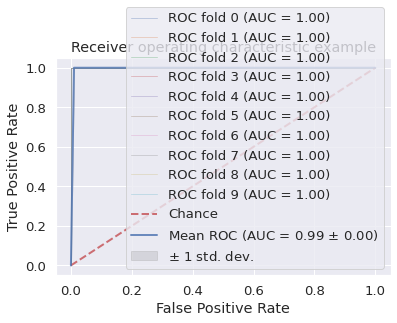

In [78]:
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    
    viz = plot_roc_curve(model, X_test, Y_test,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

In [79]:
2# Pickle model 
pd.to_pickle(model,r'/content/sample_data/model.pickle')

# Unpickle model 
model = pd.read_pickle(r'/content/sample_data/model.pickle') 
# read a pickle pd.read_pickle('model.pkl')

# Take input from user
sepal_length = float(input("Enter sepal_length: "))
sepal_width = float(input("Enter sepa_width: "))
petal_length = float(input("Enter petal_length: "))
petal_width = float(input("Enter petal_width: "))

result = model.predict([[sepal_length,sepal_width,petal_length,petal_width]])  # input must be 2D array
print(result)

Enter sepal_length: 1
Enter sepa_width: 


ValueError: ignored

In [80]:
# Take input from user
Kelengkapan = input("Enter Kelengkapan: ")
Umur = input("Enter Umur: ")
Status = input("Enter Status: ")
pendidikan = input("Enter pendidikan: ")
jurusan = input("Enter jurusan: ")
sertifikat = input("Enter sertifikat: ")
Pengalaman = input("Enter Pengalaman: ")
IPK = input("Enter IPK: ")
TPA = input("Enter TPA: ")

Hasil =model.predict([[Kelengkapan, Umur,Status,pendidikan,jurusan,sertifikat,Pengalaman,IPK,TPA]])
print(Hasil)

Enter Kelengkapan: 2
Enter Umur: 2
Enter Status: 1
Enter pendidikan: 1
Enter jurusan: 0
Enter sertifikat: 1
Enter Pengalaman: 1
Enter IPK: 1
Enter TPA: 11
['Ya']


In [58]:
11# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2, 10)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


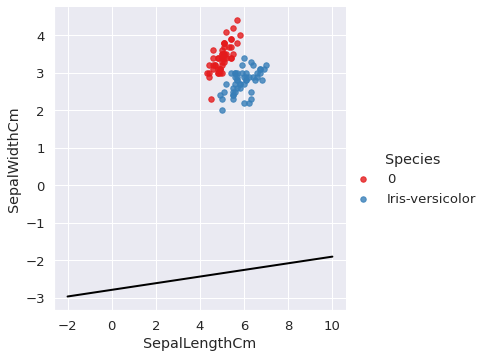

In [21]:
import seaborn as sns; sns.set(font_scale=1.2)
sns.lmplot('SepalLengthCm','SepalWidthCm', data=df, hue='Species',palette='Set1', fit_reg=False, scatter_kws={"s": 30});
plt.plot(xx, yy, linewidth=2, color='black');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


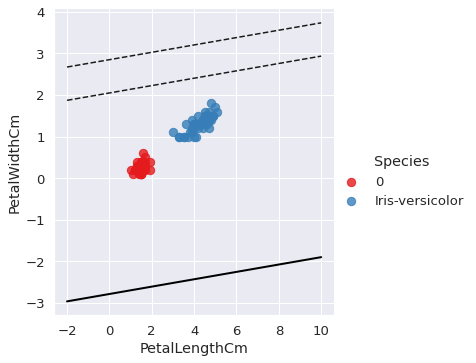

In [22]:
# Look at the margins and support vectors
sns.lmplot('PetalLengthCm', 'PetalWidthCm', data=df, hue='Species', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');